In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [2]:
def load_data(path):
    """Load CSV file(s). This dataset on Kaggle contains a main CSV; adapt filenames as needed."""
    df = pd.read_csv(path)
    return df


def quick_overview(df):
    display(df.head())
    print('\nData shape:', df.shape)
    print('\nColumns and types:')
    print(df.dtypes)
    print('\nBasic describe:')
    display(df.describe(include='all').T)


def missingness_report(df):
    miss = df.isnull().sum().sort_values(ascending=False)
    miss_pct = (miss / len(df) * 100).round(2)
    report = pd.concat([miss, miss_pct], axis=1)
    report.columns = ['missing_count', 'missing_pct']
    return report[report['missing_count']>0]


def plot_missingness(df):
    msno.matrix(df)
    plt.title('Missingness matrix')
    plt.show()
    msno.heatmap(df)
    plt.title('Missingness correlation (heatmap)')
    plt.show()


def plot_distributions(df, numeric_cols=None, max_plots=12):
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = numeric_cols[:max_plots]
    n = len(numeric_cols)
    cols = 3
    rows = int(np.ceil(n/cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
    axes = axes.flatten()
    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(col)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


def boxplot_outliers(df, cols=None, max_plots=12):
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cols = cols[:max_plots]
    n = len(cols)
    cols_per_row = 3
    rows = int(np.ceil(n/cols_per_row))
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row*5, rows*4))
    axes = axes.flatten()
    for i, c in enumerate(cols):
        sns.boxplot(x=df[c], ax=axes[i])
        axes[i].set_title(c)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


def correlation_inspection(df, numeric_only=True, threshold=0.7):
    num = df.select_dtypes(include=[np.number]) if numeric_only else df
    corr = num.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title('Correlation matrix')
    plt.show()
    # high correlations
    high_corr = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i,j]) >= threshold:
                high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))
    return high_corr




In [3]:
# 4. Load dataset 
DATA_PATH = 'C:/Data/ev_charging_patterns.csv'  
if os.path.exists(DATA_PATH):
    df = load_data(DATA_PATH)
else:
    print(f"File {DATA_PATH} not found. Please download from Kaggle and set DATA_PATH accordingly.")
    df = None

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler



Data shape: (1320, 20)

Columns and types:
User ID                                      object
Vehicle Model                                object
Battery Capacity (kWh)                      float64
Charging Station ID                          object
Charging Station Location                    object
Charging Start Time                          object
Charging End Time                            object
Energy Consumed (kWh)                       float64
Charging Duration (hours)                   float64
Charging Rate (kW)                          float64
Charging Cost (USD)                         float64
Time of Day                                  object
Day of Week                                  object
State of Charge (Start %)                   float64
State of Charge (End %)                     float64
Distance Driven (since last charge) (km)    float64
Temperature (°C)                            float64
Vehicle Age (years)                         float64
Charger Type        

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,1320,1320,User_1320,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Model,1320,5,Tesla Model 3,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Battery Capacity (kWh),1320.0,NaN,NaN,NaN,74.534692,20.626914,1.532807,62.0,75.0,85.0,193.003074
Charging Station ID,1320,462,Station_108,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging Station Location,1320,5,Los Angeles,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging Start Time,1320,1320,2024-02-24 23:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Charging End Time,1320,1309,2024-01-06 18:48:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Energy Consumed (kWh),1254.0,NaN,NaN,NaN,42.642894,22.411705,0.045772,23.881193,42.691405,61.206218,152.238758
Charging Duration (hours),1320.0,NaN,NaN,NaN,2.269377,1.061037,0.095314,1.397623,2.258136,3.112806,7.635145
Charging Rate (kW),1254.0,NaN,NaN,NaN,25.963003,14.011326,1.472549,13.856583,25.603799,37.502998,97.342255



Missingness report (columns with missing values):


,missing_count,missing_pct
Charging Rate (kW),66,5.0
Distance Driven (since last charge) (km),66,5.0
Energy Consumed (kWh),66,5.0


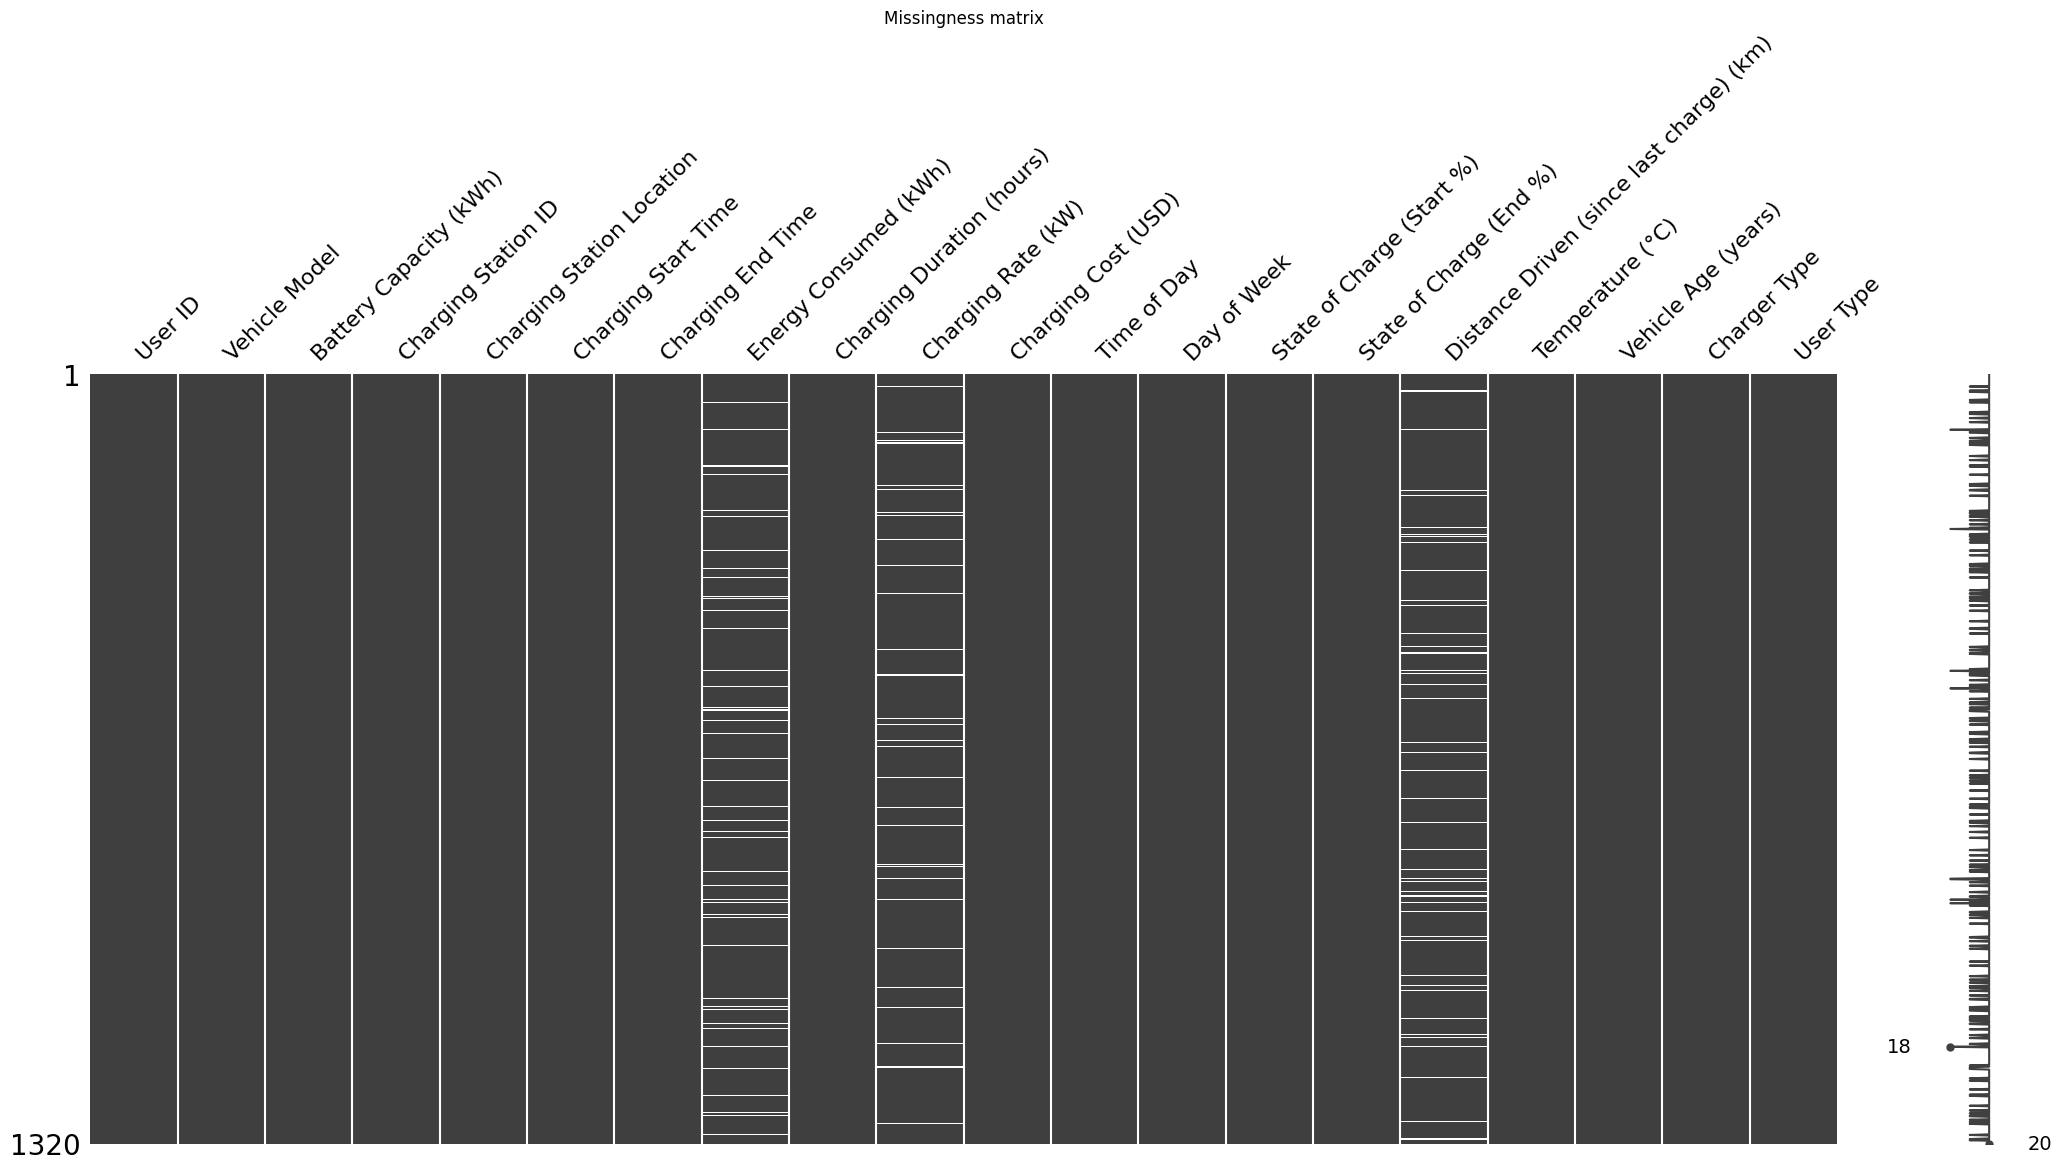

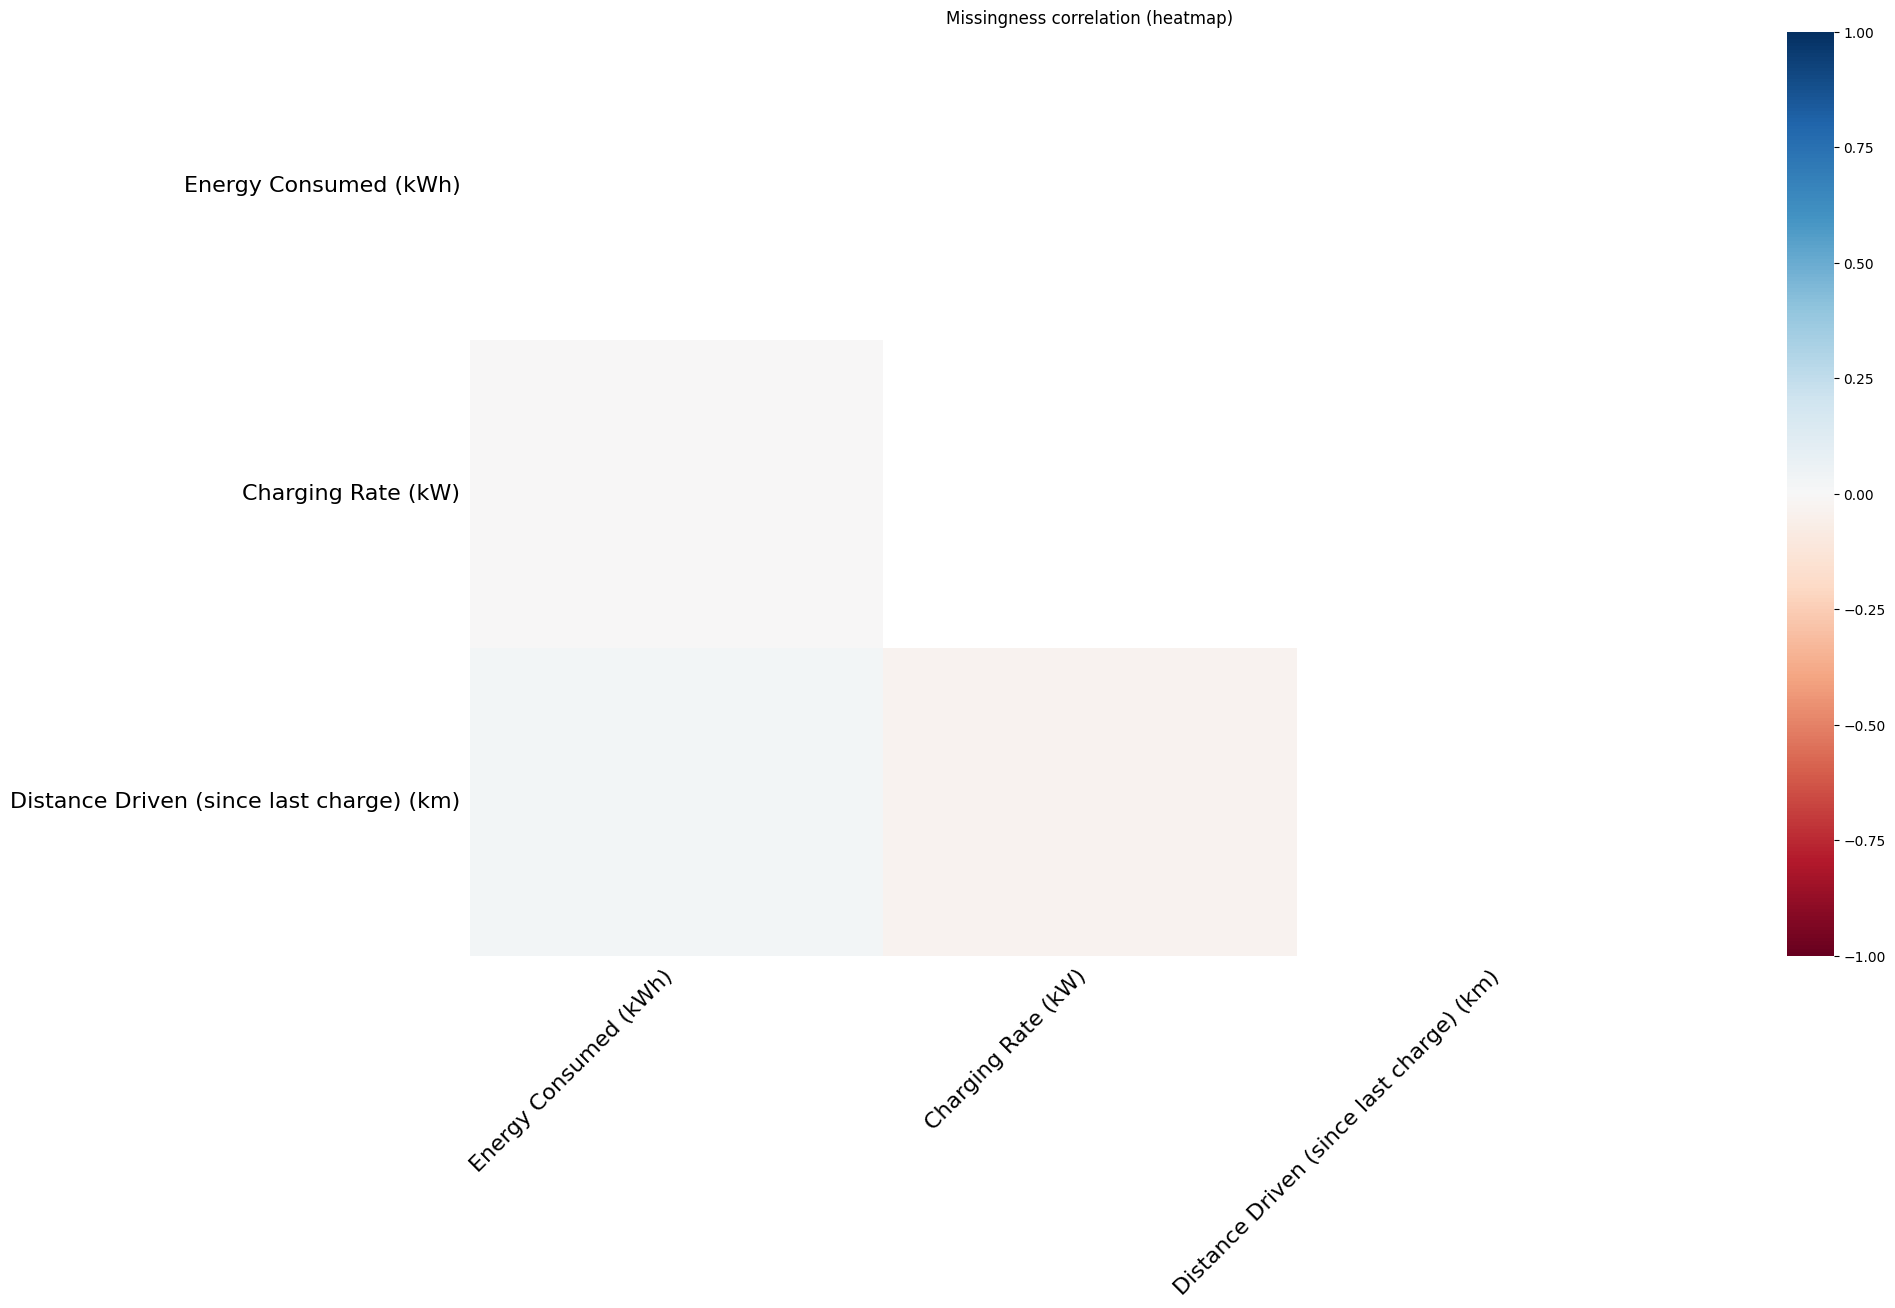


Distributions


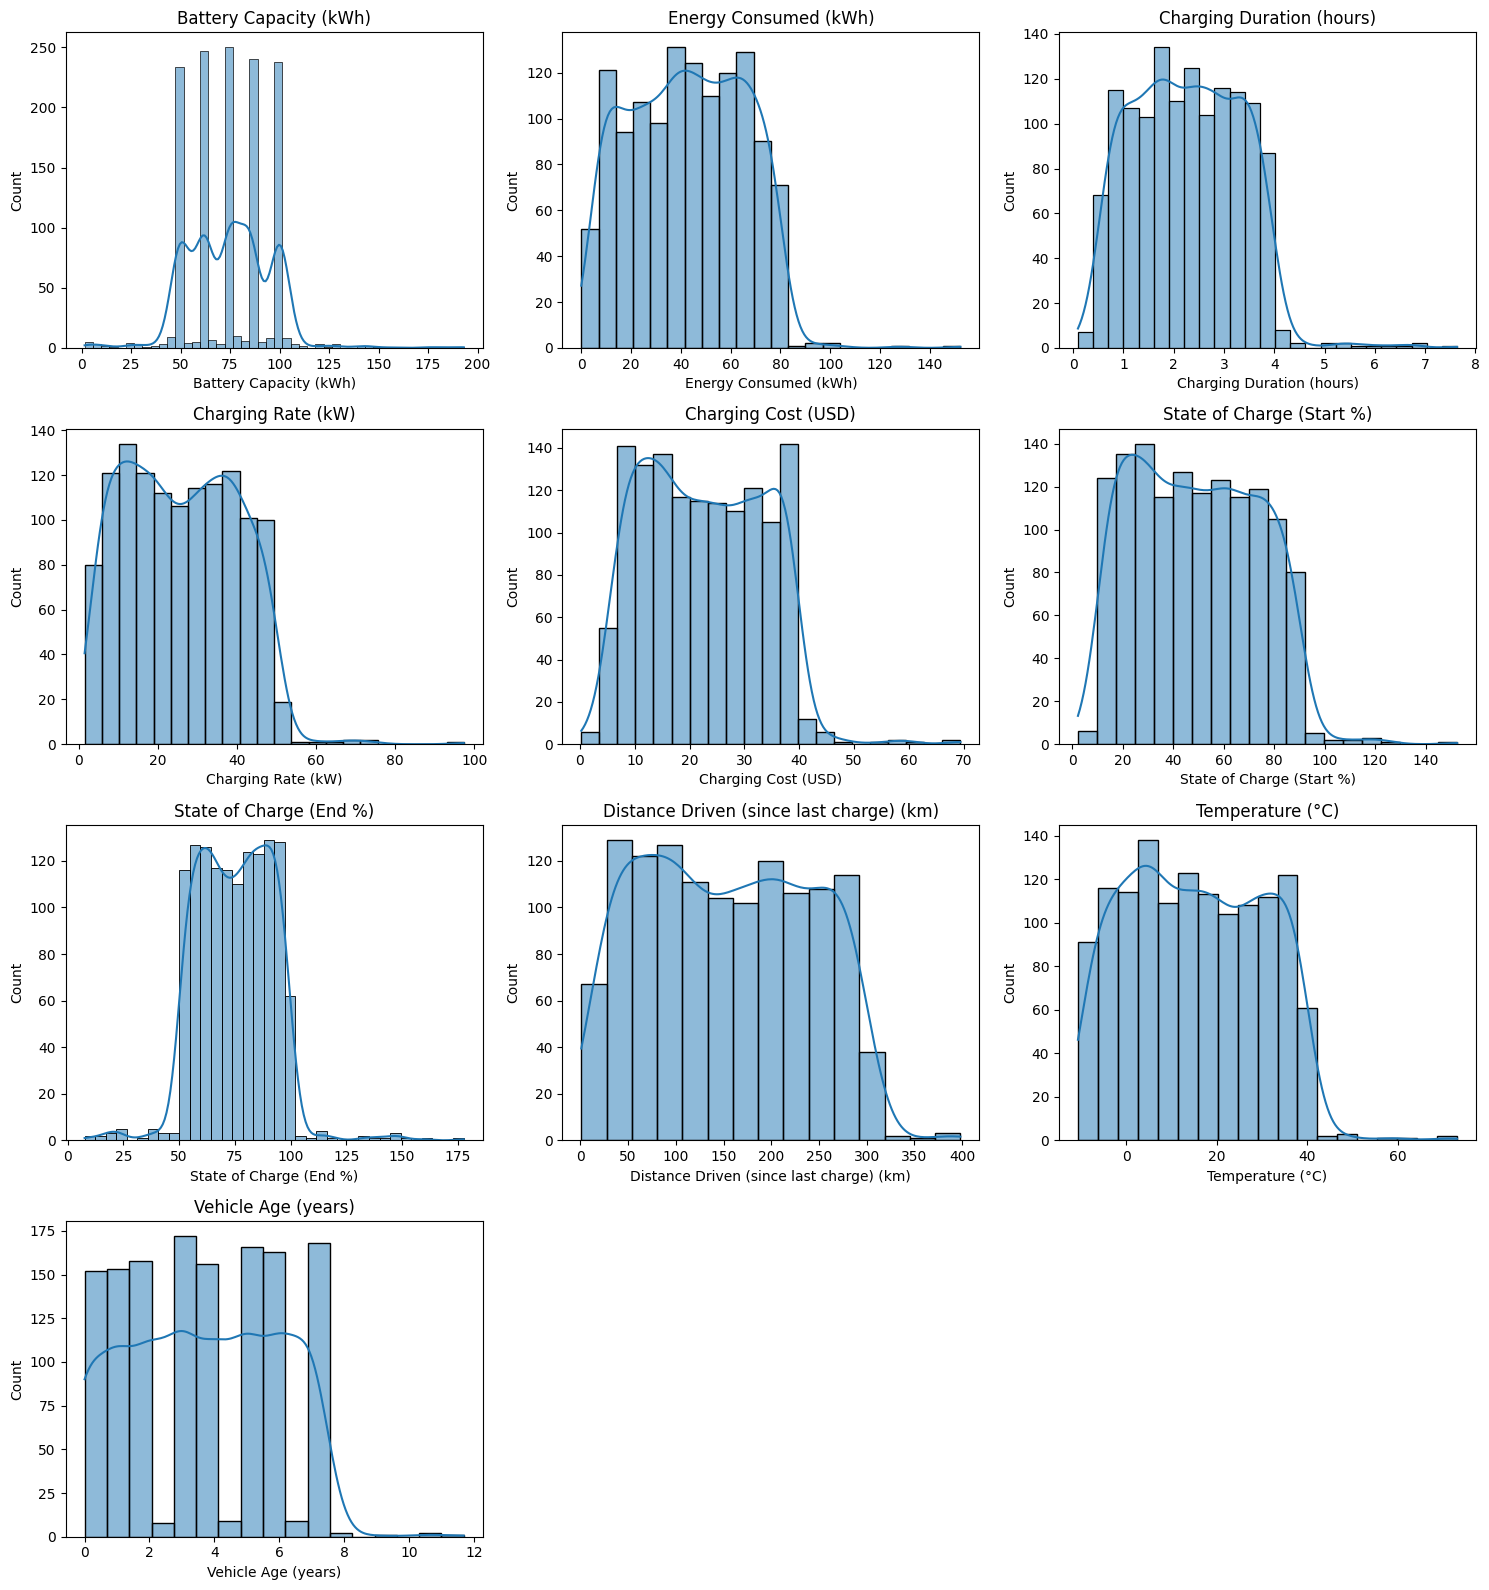

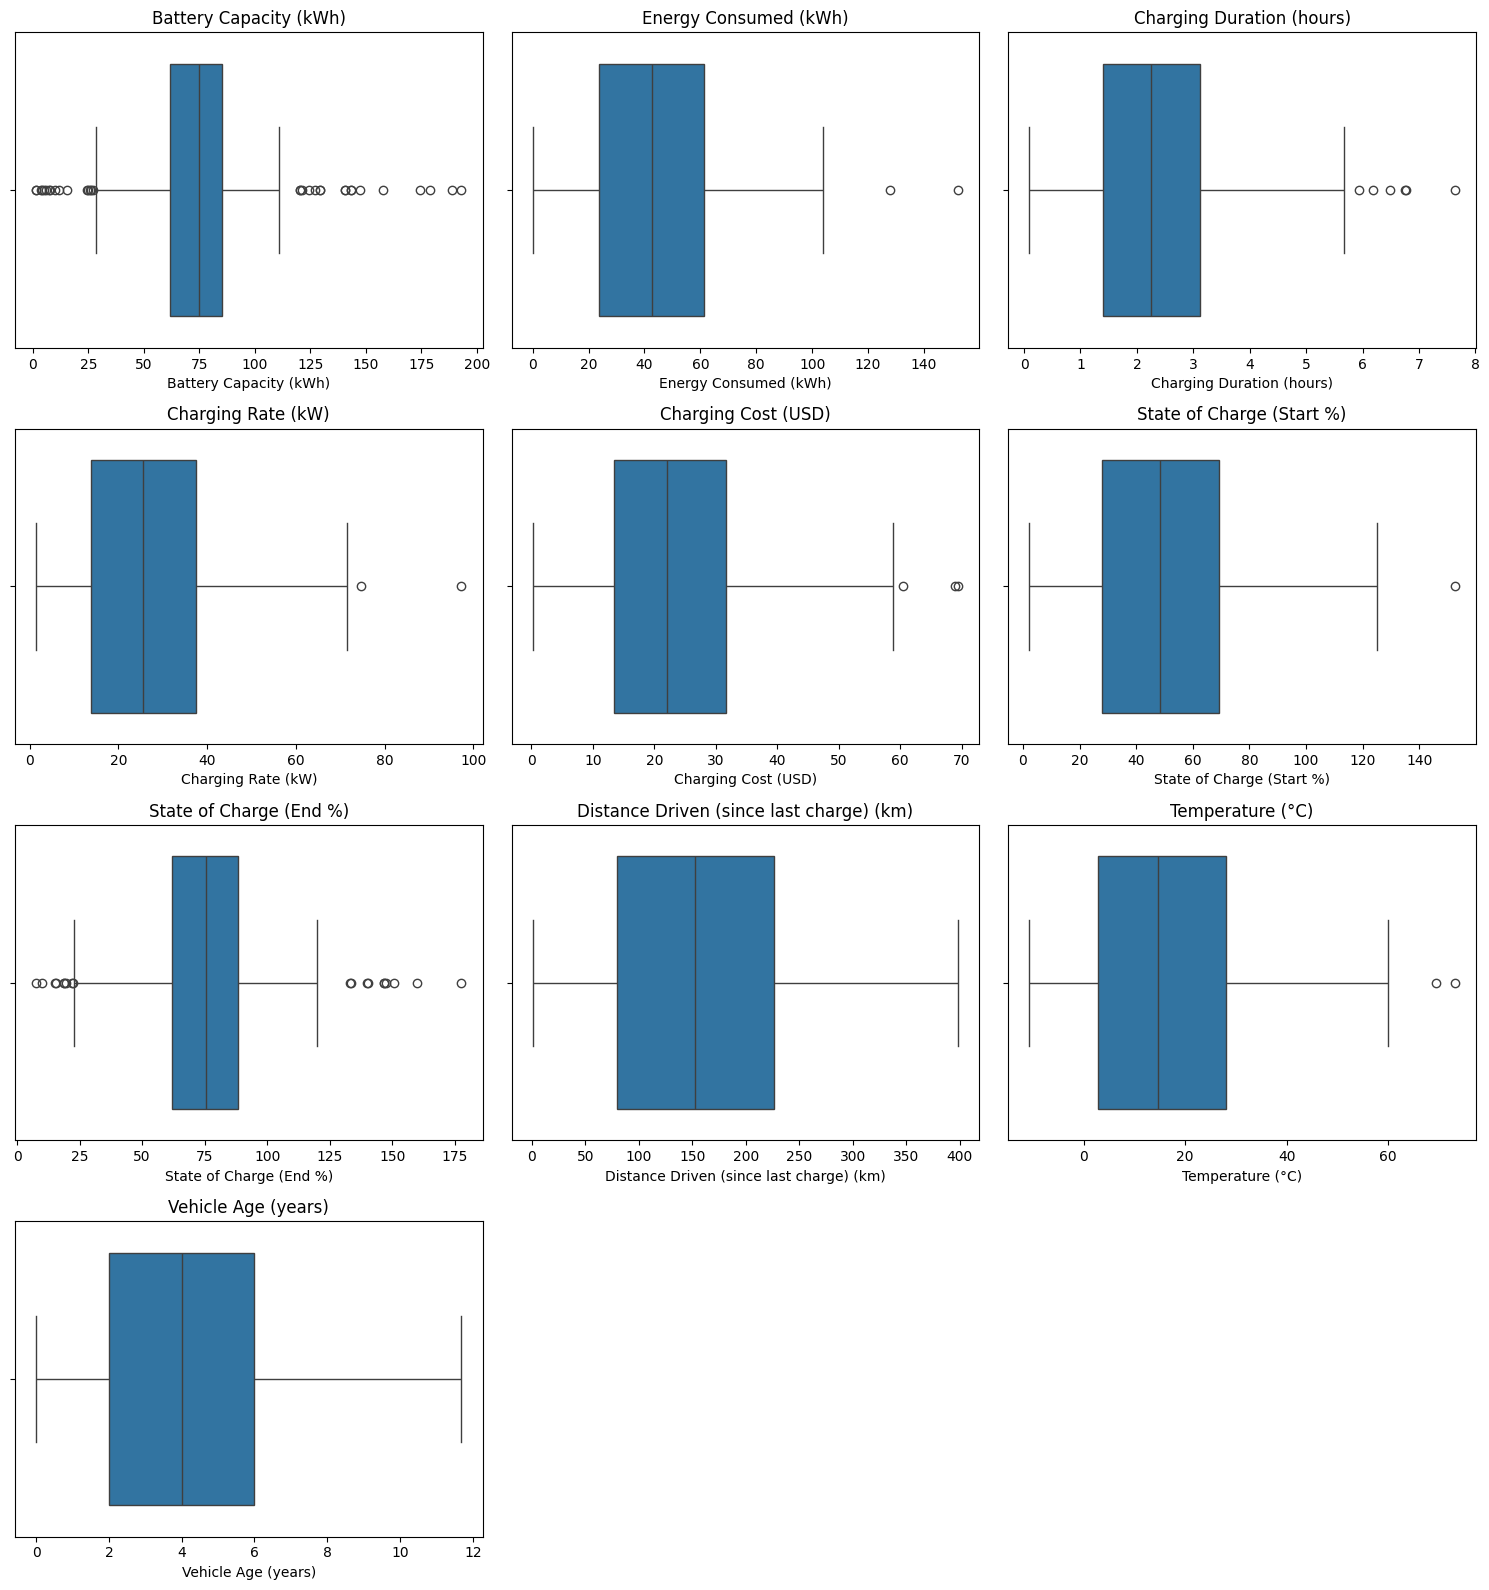

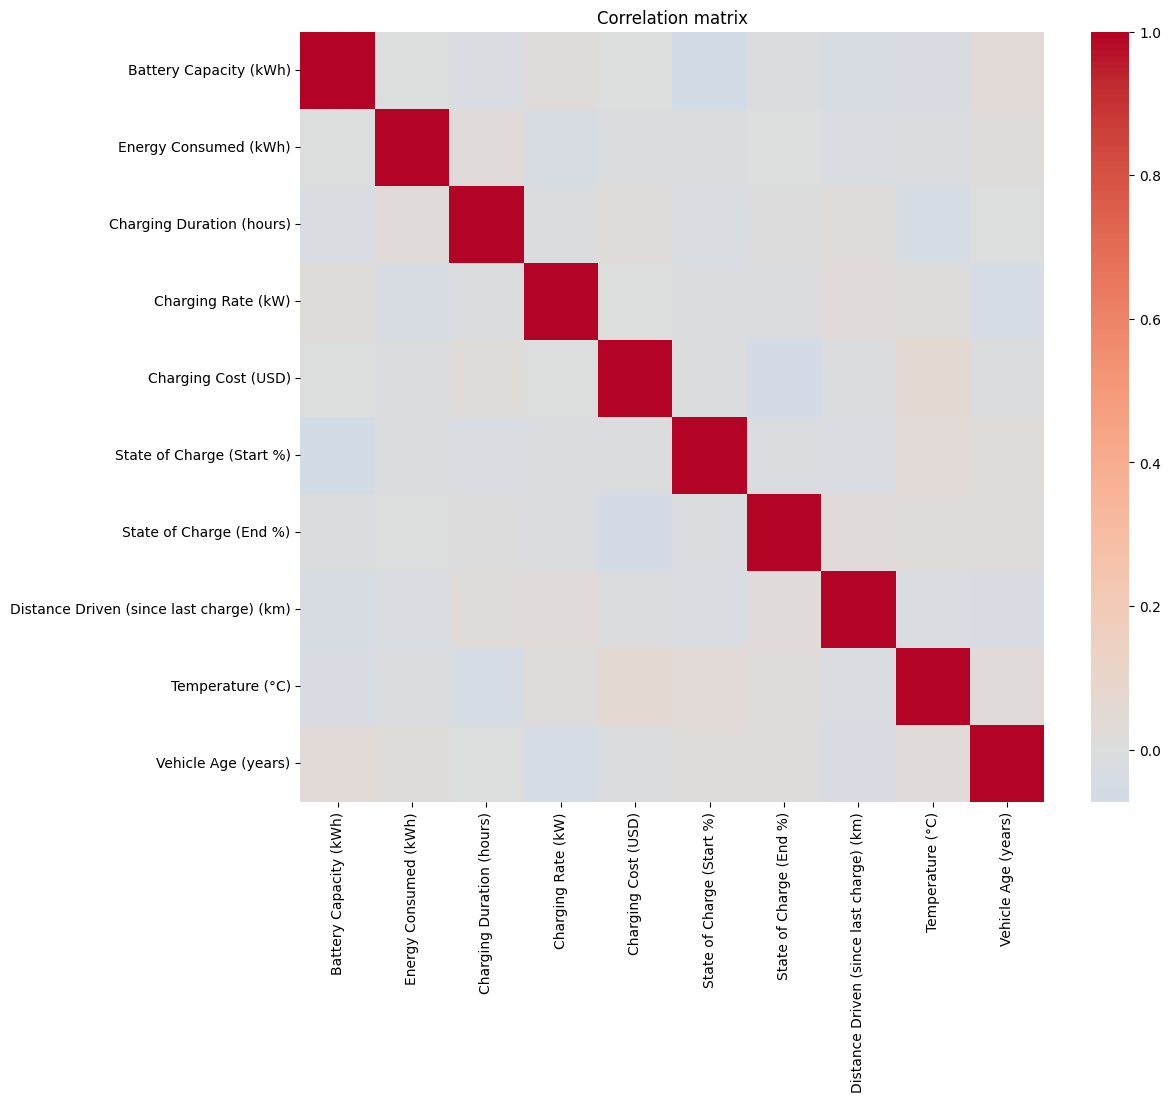


High correlations (abs >= 0.7): []


In [4]:
# 5. Exploratory Data Analysis 
if df is not None:
    quick_overview(df)
    # missingness
    mr = missingness_report(df)
    print('\nMissingness report (columns with missing values):')
    display(mr)
    plot_missingness(df)
    # distributions
    print('\nDistributions')
    plot_distributions(df)
    # boxplots
    boxplot_outliers(df)
    # correlation
    high_corr = correlation_inspection(df)
    print('\nHigh correlations (abs >= 0.7):', high_corr)

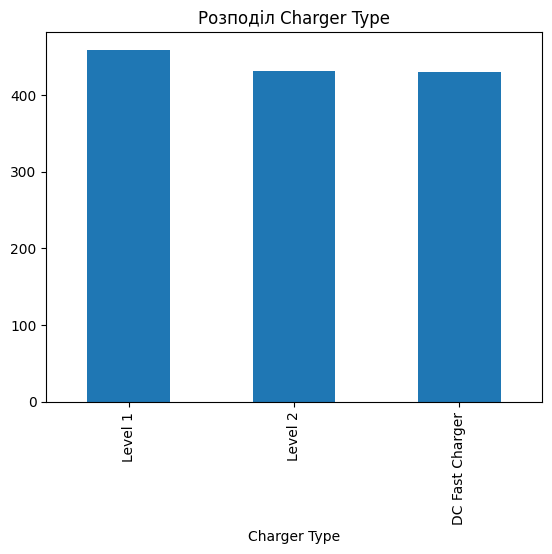

In [5]:
# 6. Категоріальні змінні
df['Charger Type'].value_counts().plot(kind='bar')
plt.title("Розподіл Charger Type")
plt.show()

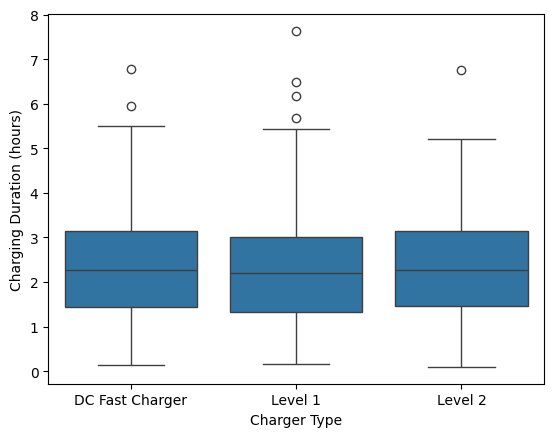

In [6]:
# 7. Взаємозв'язки
sns.boxplot(x='Charger Type', y='Charging Duration (hours)', data=df)
plt.show()